<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/03_computer_vision_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start GO!

In [ ]:
"hello"

'hello'

In [ ]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


In [ ]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.2MB/s]


In [ ]:
len(train_data[0])

2

In [ ]:
img, label = train_data[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 9


In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


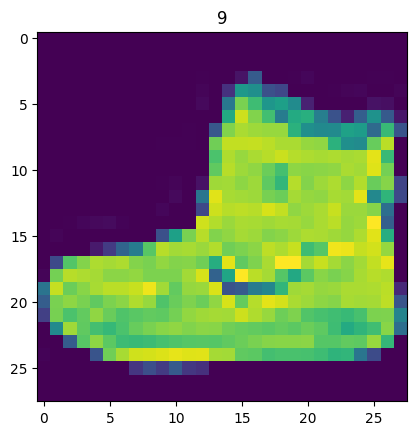

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
(next(iter(train_dataloader))[0]).shape

torch.Size([32, 1, 28, 28])

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


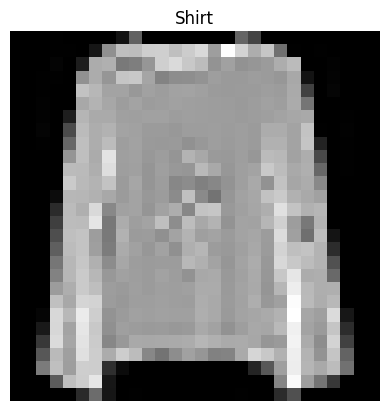

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {flatten_model(x).shape}")
print(f"Dim after flattening: {flatten_model(x).dim()}")
#flatten_model(x)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])
Dim after flattening: 2


In [ ]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
int(class_names.__len__())

10

In [ ]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=int(class_names.__len__()))
model_1.to("cpu")

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.randn((1, 28, 28))
dummy_x.shape

torch.Size([1, 28, 28])

In [ ]:
model_1(dummy_x)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>)

In [ ]:
model_1(dummy_x).squeeze().__len__()

10

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [ ]:
model_1.state_dict()["layer_stack.1.weight"].squeeze()[0].__len__()

784

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.01)

In [ ]:
next(model_1.parameters()).squeeze().shape

torch.Size([10, 784])

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end-start
  print(f"Train tim on: {device} took {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train tim on: cpu took 0.000 seconds


3.52399999883346e-05

## optimizer will step per batch
## loss will be calculated per batch

In [ ]:
X, y  = next(iter(train_dataloader))
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}, {y}")

Shape of X: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]), tensor([2, 1, 1, 4, 3, 1, 4, 1, 2, 6, 3, 2, 7, 2, 0, 6, 1, 2, 0, 1, 3, 9, 4, 5,
        1, 9, 8, 2, 2, 6, 8, 3])


In [ ]:
dummy_x.shape

torch.Size([1, 28, 28])

In [ ]:
model_1(dummy_x)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>)

In [ ]:
y = torch.tensor([1])
print(f"{model_1(dummy_x)}, {y}")
loss_fn(model_1(dummy_x), y)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>), tensor([1])


tensor(1.5906, grad_fn=<NllLossBackward0>)

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss / len(train_dataloader)
  print(f"Train loss: {train_loss}")

  test_loss, test_acc = 0, 0

  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.5669195055961609
Test loss: 0.5064043402671814 | Test accuracy: 82.1785143769968
Epoch: 1
Train loss: 0.5030061602592468
Test loss: 0.49554505944252014 | Test accuracy: 82.90734824281151
Epoch: 2
Train loss: 0.4815042018890381
Test loss: 0.5599977970123291 | Test accuracy: 80.86062300319489
Train tim on: cpu took 30.377 seconds


In [ ]:
X, y = next(iter(test_dataloader))
X, y.__len__()

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [ ]:
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  """Return dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss + loss_fn(y_pred, y)
      acc = acc + accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
  loss = loss / len(data_loader)
  acc = acc / len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5599977970123291,
 'model_acc': 80.86062300319489}

In [ ]:
model_1.__class__.__name__

'FashionMNISTModelV1'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV2(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
model_2 = FashionMNISTModelV2(input_shape=784, hidden_units=10, output_shape=10)
model_2.to(device)

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [ ]:
loss_fn, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ))

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model_2.train()
    y_pred = model_2(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss / len(train_dataloader)
  print(f"Train loss: {train_loss}")

  test_loss, test_acc = 0, 0

  model_2.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_2(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_2.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.0502856969833374
Test loss: 1.0594635009765625 | Test accuracy: 63.19888178913738
Epoch: 1
Train loss: 0.9877870082855225
Test loss: 0.9895941615104675 | Test accuracy: 66.1841054313099
Epoch: 2
Train loss: 0.9266937375068665
Test loss: 0.9403244853019714 | Test accuracy: 66.48362619808307
Train tim on: cuda:0 took 32.510 seconds


In [ ]:
eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)

AttributeError: 'DataLoader' object has no attribute 'to'

In [ ]:
74.52076677316293 == eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)["model_acc"]

In [ ]:
def train_func(model: torch.nn.Module,
               epochs: int,
               train_dataloader: torch.utils.data.DataLoader,
               test_dataloader: torch.utils.data.DataLoader,
               device: torch.device):
  model.to(device)

  for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
      model.train()

      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss = train_loss / len(train_dataloader)
    print(f"Train loss: {train_loss}")



In [ ]:
train_func(model_2, 3, train_dataloader, test_dataloader, device)

Epoch: 0
Train loss: 0.907374382019043
Epoch: 1
Train loss: 0.905698299407959
Epoch: 2
Train loss: 0.8956643342971802


In [ ]:
def test_func(model: torch.nn.Module,
              train_dataloader: torch.utils.data.DataLoader,
              test_dataloader: torch.utils.data.DataLoader,
              device: torch.device,
              accuracy_fn ):


    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_pred = model(X_test)
        test_loss += loss_fn(test_pred, y_test)
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

    print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

In [ ]:
test_func(model_2, train_dataloader, test_dataloader, device, accuracy_fn)

Test loss: 0.9323424100875854 | Test accuracy: 66.7332268370607


In [ ]:
eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

# Creating CCN Model - Juhu!

In [ ]:
class FashionMNISTModelV3(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv1_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # shape 28*28
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 26*26
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)) # 12 * 12
    )

    self.conv2_block = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 11*11
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1), # 9 * 9
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)) # 4 * 4
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv1_block(x)
    x = self.conv2_block(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.tensor([49]).to(device).item()

49

In [ ]:
model_3 = FashionMNISTModelV3(input_shape=1, hidden_units=10, output_shape=10)
model_3

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

images = torch.rand(size=(32, 1, 28, 28))
test_image = images[0]
print(test_image.shape)


torch.Size([1, 28, 28])


In [ ]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3,3), stride=1, padding=10)
conv_layer

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(10, 10))

In [ ]:
conv_layer(test_image).shape

torch.Size([10, 46, 46])

In [ ]:
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         ...,
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
         [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069]],

        [[ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         ...,
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165],
         [ 0.2165,  0.2165,  0.2165,  ...,  0.2165,  0.2165,  0.2165]],

        [[ 0.1037,  0.1037,  0.1037,  ...,  0.1037,  0.1037,  0.1037],
         [ 0.1037,  0.1037,  0.1037,  ...,  0

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
image.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [ ]:
pooling_layer = nn.MaxPool2d(kernel_size=(2))
pooling_layer

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [ ]:
pooling_layer(image).shape

torch.Size([1, 14, 14])

In [ ]:
t = torch.randn([1,3,3])

In [ ]:
t.shape

torch.Size([1, 3, 3])

In [ ]:
t.dim()

3

In [ ]:
t

tensor([[[-0.0548,  1.0495, -1.0868],
         [ 1.8633,  0.4007, -0.1691],
         [ 1.2881,  0.5638,  0.8724]]])

In [ ]:
pooling_layer(t)

tensor([[[1.8633]]])

In [ ]:
t.max()

tensor(1.8633)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

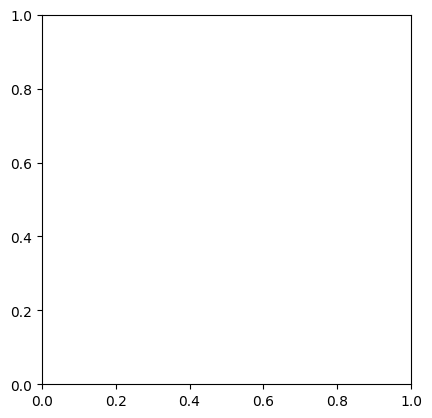

In [ ]:
plt.imshow(image.squeeze(), cmap="grey")

In [ ]:
device

'cuda'

In [ ]:
model_3.to(device)

FashionMNISTModelV3(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
image = image.to(device)
image.device

device(type='cuda', index=0)

In [ ]:
model_3.to(device)
model_3(image.unsqueeze(dim=0))

tensor([[ 0.0040, -0.0553, -0.0007,  0.0505, -0.0090,  0.0005, -0.0054, -0.0007,
          0.0013, -0.0410]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.01)

# Testing and Training the CNN Model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

for epoch in tqdm(range(3)):
  print(f"Epoch: {epoch}")
  train_func(model_3, 1, train_dataloader, test_dataloader, device)
  test_func(model_3, train_dataloader, test_dataloader, device, accuracy_fn)

train_time_end_on_cpu = timer()

print(f"Total train time: {print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_3.parameters()).device))}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Epoch: 0
Train loss: 0.39657509326934814
Test loss: 0.40254467725753784 | Test accuracy: 85.01397763578275
Epoch: 1
Epoch: 0
Train loss: 0.37651389837265015
Test loss: 0.40458041429519653 | Test accuracy: 84.90415335463258
Epoch: 2
Epoch: 0
Train loss: 0.36409792304039
Test loss: 0.40848758816719055 | Test accuracy: 84.97404153354633
Train tim on: cuda:0 took 40.110 seconds
Total train time: 40.10994201599988


In [ ]:
eval_model(model_3, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.40848758816719055,
 'model_acc': 84.97404153354633}